In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt




# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-genre-classification-ia/df_train.csv
/kaggle/input/music-genre-classification-ia/df_binary_Rock_Other.csv
/kaggle/input/music-genre-classification-ia/df_sample.csv
/kaggle/input/music-genre-classification-ia/df_binary_Pop_Rock.csv
/kaggle/input/music-genre-classification-ia/df_test.csv
/kaggle/input/music-genre-classification-ia/df_all_classes.csv
/kaggle/input/music-genre-classification-ia/df_ternary_Rock_Pop_Instrumental.csv
/kaggle/input/music-genre-classification-ia/df_binary_Instrumental_Metal.csv


### Выполненные пункты
 
 Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

 Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

 При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

 Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

 Замерить время обучения каждой модели для каждой стратегии.

 Для оценки качества моделей используйте метрику AUC-ROC.

 Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.



In [2]:
df = pd.read_csv('/kaggle/input/music-genre-classification-ia/df_all_classes.csv')

In [3]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,Indie
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,HipHop
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,Rock


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17996 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 17996 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    17996 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [5]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039
std,17.218436,0.166268,0.235373,3.012651,4.049151,0.480949,0.083576,0.310632,0.264499,0.159212,0.240195,29.571527,1.119891e+05,0.361618
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,33.000000,0.432000,0.509000,4.000000,-9.538000,0.000000,0.034800,0.004300,0.000294,0.097500,0.297000,99.620750,1.663370e+05,4.000000
50%,44.000000,0.545000,0.700000,5.952447,-7.016000,1.000000,0.047400,0.081400,0.049850,0.129000,0.481000,120.065500,2.091600e+05,4.000000
75%,56.000000,0.659000,0.860000,8.000000,-5.189000,1.000000,0.083000,0.434000,0.177562,0.258000,0.672000,141.969250,2.524900e+05,4.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


In [6]:
df = df.drop(columns=['Artist Name', 'Track Name'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


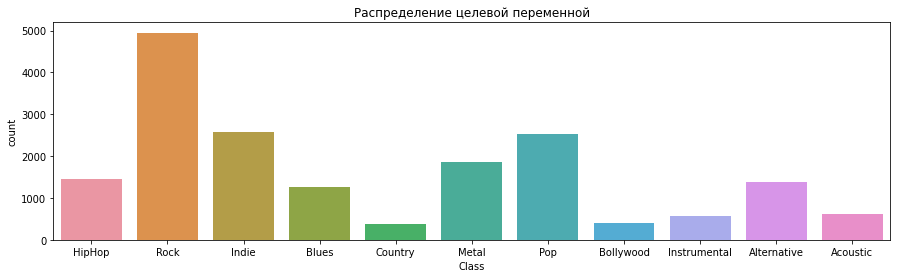

In [7]:
plt.figure(figsize=(15,4))
sns.countplot(df["Class"])
plt.title('Распределение целевой переменной');

In [8]:
df['Class'].value_counts()

Rock            4949
Indie           2587
Pop             2524
Metal           1854
HipHop          1447
Alternative     1373
Blues           1272
Acoustic         625
Instrumental     576
Bollywood        402
Country          387
Name: Class, dtype: int64

In [9]:
# sns.pairplot(df, hue='Class')

In [10]:
df.columns

Index(['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [11]:
num_f = ['Popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_in min/ms']

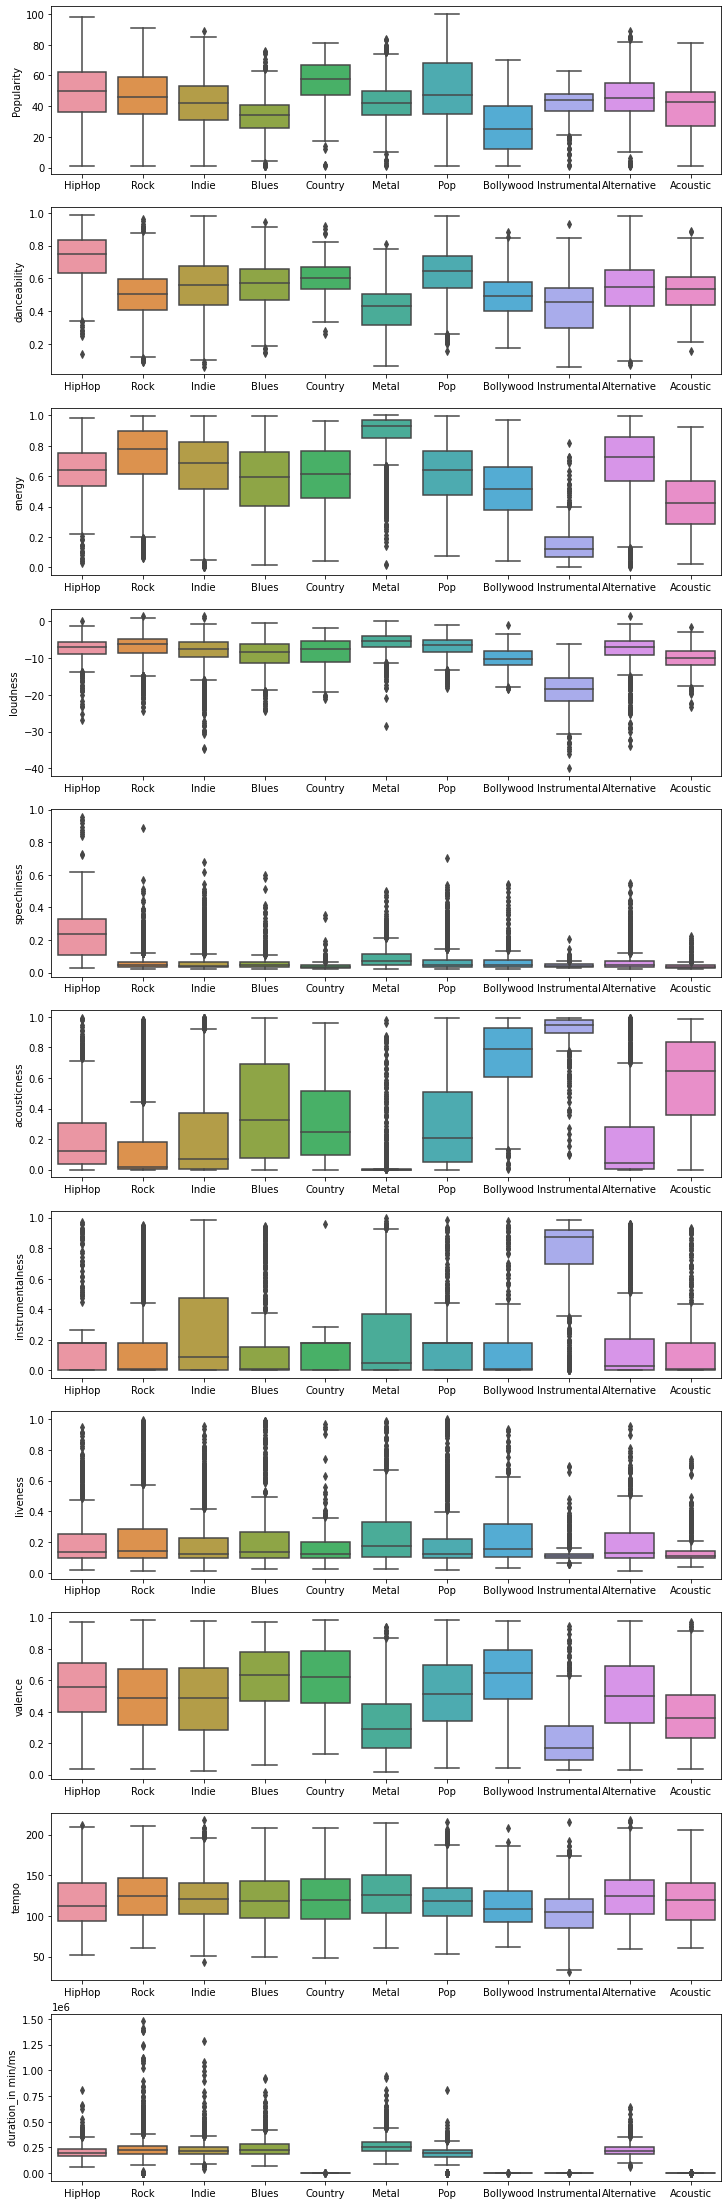

In [12]:
plt.figure(figsize=(12, 40))
for i, num in enumerate(num_f):
    plt.subplot(11,1, i+1)
    sns.boxplot(x="Class",y=num, data=df)
    plt.xlabel('')


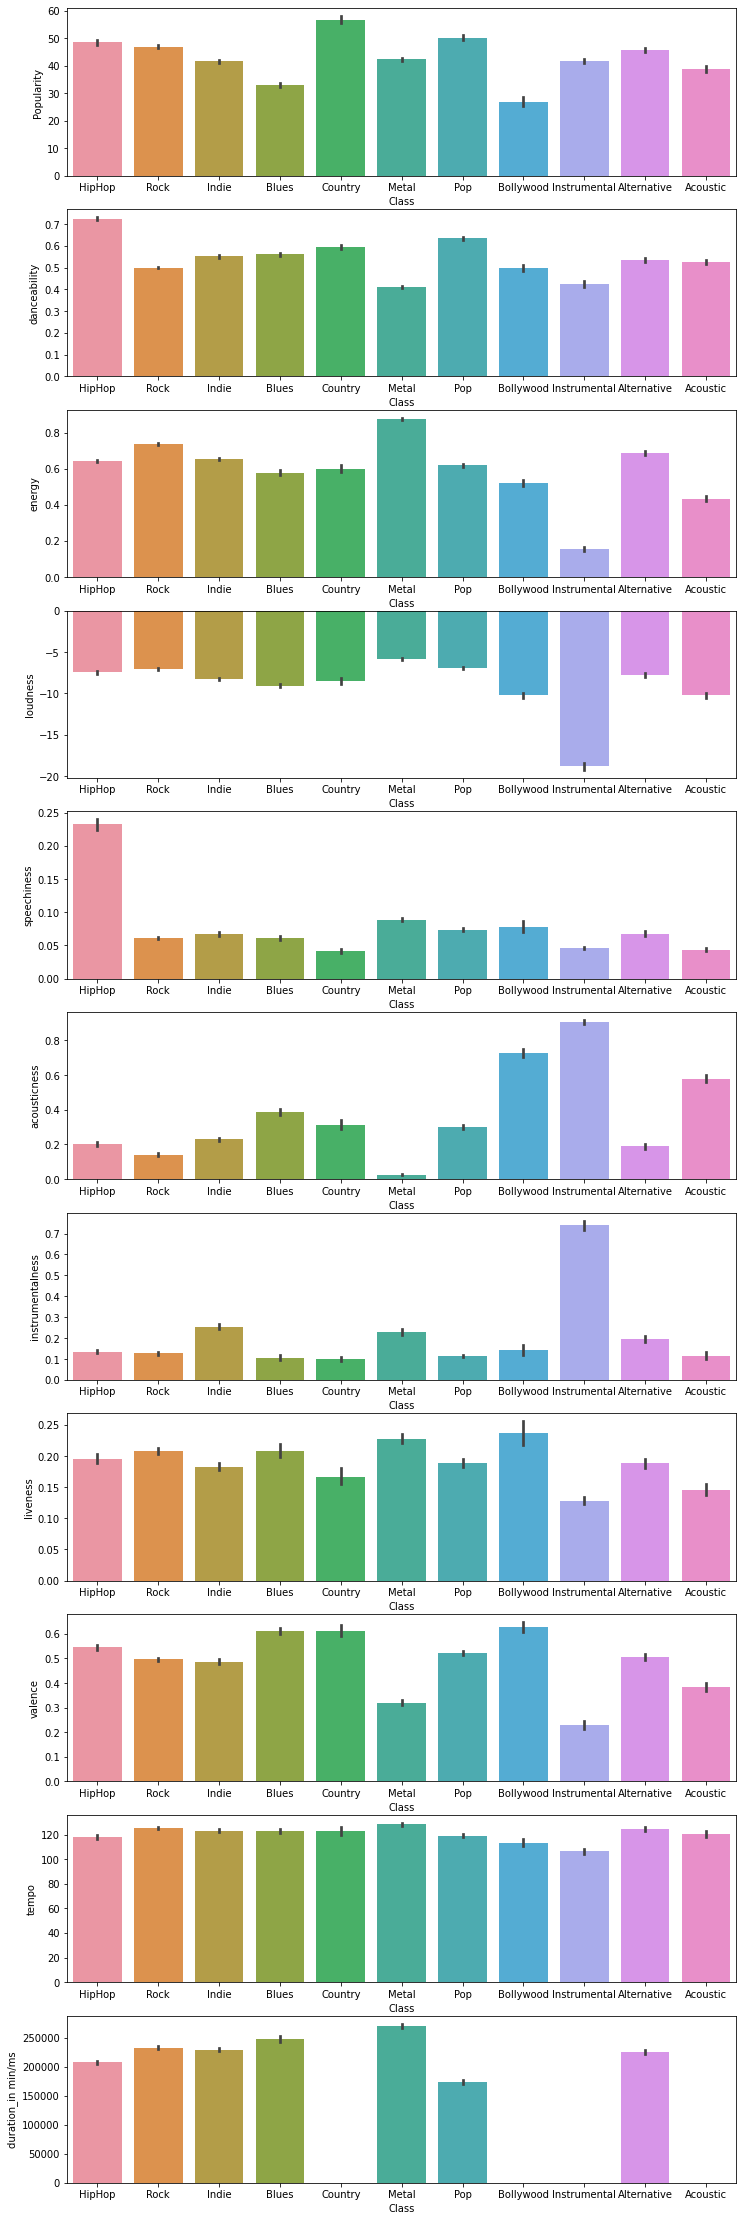

In [13]:
plt.figure(figsize=(12, 40))
for i, num in enumerate(num_f):
    plt.subplot(11,1, i+1)
    sns.barplot(x="Class",y=num, data=df)

<AxesSubplot:xlabel='key', ylabel='count'>

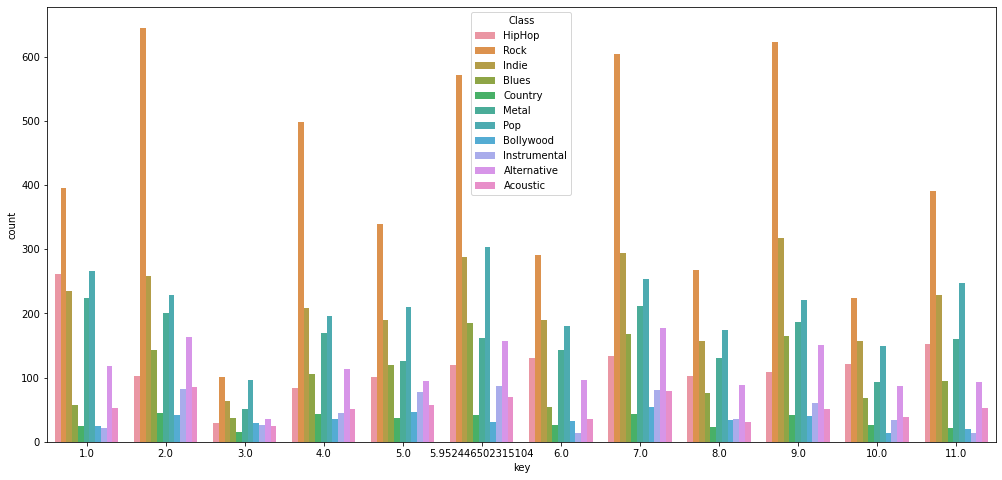

In [14]:
plt.figure(figsize=(17,8))
sns.countplot(data=df, x="key", hue="Class")

<AxesSubplot:xlabel='mode', ylabel='count'>

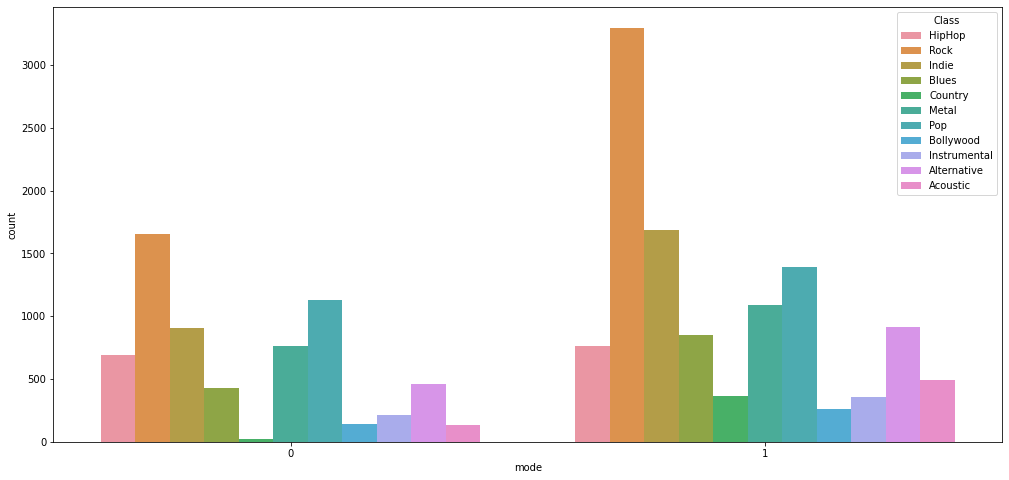

In [15]:
plt.figure(figsize=(17,8))
sns.countplot(data=df, x="mode", hue="Class")

<AxesSubplot:xlabel='time_signature', ylabel='count'>

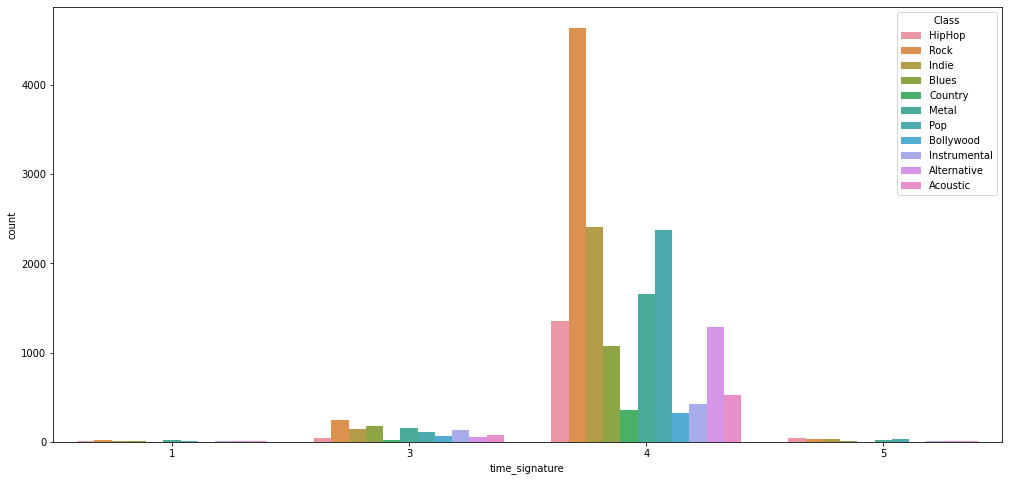

In [16]:
plt.figure(figsize=(17,8))
sns.countplot(data=df, x="time_signature", hue="Class")


In [17]:
df["Class"] = df["Class"].astype('category')


In [18]:
df["Class"] = df["Class"].cat.codes
df.head()


,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


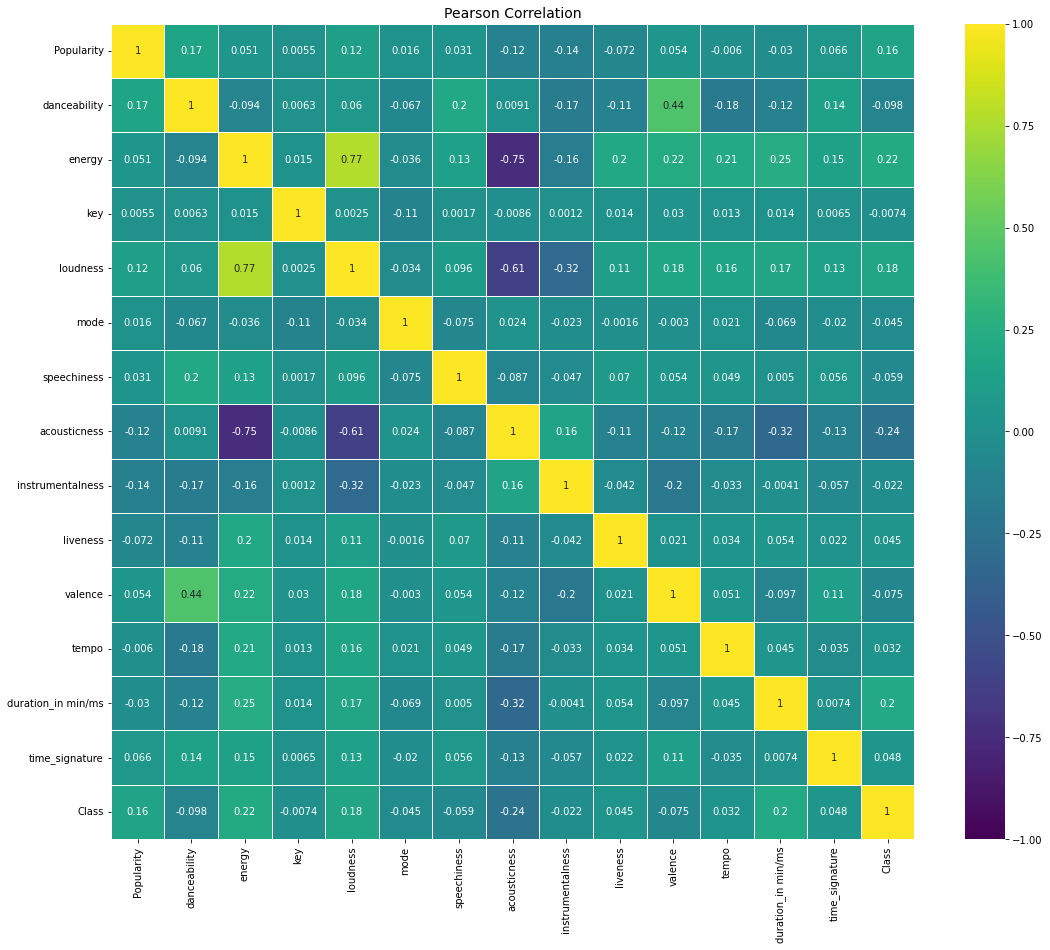

In [19]:
correlation = df.corr()

corr = plt.figure(figsize= (18, 15))
corr = sns.heatmap(correlation, vmax=1, vmin=-1,
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white")
corr.set_title("Pearson Correlation",fontsize= 14)

plt.show()


In [20]:
y = df['Class']
X = df.drop(columns='Class')


In [21]:
import math
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


import warnings

warnings.filterwarnings('ignore')


In [22]:
models_grid = {"DecisionTreeClassifier":   {'estimator__max_features': ['auto', 'sqrt'],
                        'estimator__max_depth': [3,5,10,15,20],
                        'estimator__criterion': ['entropy','gini']},
               
             "LogisticRegression": {
                        'estimator__C': np.logspace(-2,3,6)},
               
              "SVC":    {'estimator__C': [0.01,0.1,0.3,0.5,1,1.5]}, 

               "KNeighborsClassifier":    {'estimator__n_neighbors': [3,5,7,12,15]}, 
               
              "GaussianNB":     {'estimator__var_smoothing': np.logspace(1,-8, num=100)}
              } 


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [24]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### OneVsRestClassifier

In [25]:
from sklearn.multiclass import OneVsRestClassifier


In [26]:
def Grid_CV(model, param, v=1, scoring='roc_auc_ovr'):
    skf = StratifiedKFold(n_splits=3)
    
    clf = model
    grid = GridSearchCV((model), param_grid=param, cv=skf, scoring=scoring, verbose=v)
    grid.fit(X_train_scaled, y_train)

    
    print(grid.best_params_)
    return(grid.best_estimator_)

In [27]:
import time

from sklearn.preprocessing import label_binarize


In [28]:
ovr_res = {}

In [29]:
tree = Grid_CV(OneVsRestClassifier(DecisionTreeClassifier(random_state=1)), models_grid['DecisionTreeClassifier'])
tree.fit(X_train_scaled, y_train)

start_time = time.time()
tree.fit(X_train_scaled, y_train)

d = time.time() - start_time

pred = tree.predict(X_test_scaled)


#   labels to binarize
labels = [int(i) for i in range(11)]


# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)


# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovr_res['tree'] = [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovr'), d]


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__max_features': 'auto'}


In [30]:
LR = Grid_CV(OneVsRestClassifier(LogisticRegression(random_state=1)), models_grid['LogisticRegression'])
LR.fit(X_train_scaled, y_train)

start_time = time.time()

LR.fit(X_train_scaled, y_train)

d = time.time() - start_time

pred = LR.predict(X_test_scaled)


# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovr_res['logreg'] = [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovr'),d]


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'estimator__C': 1000.0}


In [31]:
knn = Grid_CV(OneVsRestClassifier(KNeighborsClassifier()), models_grid['KNeighborsClassifier'])

knn.fit(X_train_scaled, y_train)

start_time = time.time()

knn.fit(X_train_scaled, y_train)

d = (time.time() - start_time)

pred = knn.predict(X_test_scaled)


# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovr_res['knn'] = [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovr'), d]


Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'estimator__n_neighbors': 15}


In [32]:
nb = Grid_CV(OneVsRestClassifier(GaussianNB()), models_grid['GaussianNB'])


start_time = time.time()

nb.fit(X_train_scaled, y_train)

d = time.time() - start_time


pred = nb.predict(X_test_scaled)


# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovr_res['nb'] = [ roc_auc_score(ytest, ypreds,average='macro',multi_class='ovr'), d]



Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'estimator__var_smoothing': 0.533669923120631}


In [33]:

cvm = Grid_CV(OneVsRestClassifier(SVC()), models_grid['SVC'])


start_time = time.time()

cvm.fit(X_train_scaled, y_train)

d = (time.time() - start_time)


pred = cvm.predict(X_test_scaled)


# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovr_res['svm'] =  [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovr'),d]


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'estimator__C': 0.01}


In [34]:
def Grid_CV(model, param, v=1, scoring='roc_auc_ovo'):
    skf = StratifiedKFold(n_splits=3)
    
    clf = model
    grid = GridSearchCV((model), param_grid=param, cv=skf, scoring=scoring, verbose=v)
    grid.fit(X_train_scaled, y_train)

    
    print(grid.best_params_)
    print(grid.best_score_)

    return(grid.best_estimator_)

### OneVsOne

In [35]:
from sklearn.multiclass import OneVsOneClassifier
ovo_res ={}

In [36]:
tree_oo = Grid_CV(OneVsOneClassifier(DecisionTreeClassifier()), models_grid['DecisionTreeClassifier'], scoring='roc_auc_ovo')

start_time = time.time()

tree_oo.fit(X_train_scaled, y_train)

d = (time.time() - start_time)

pred = tree_oo.predict(X_test_scaled)

# Binarize ytest with shape (n_samples, n_classes)




ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

print("roc_auc", roc_auc_score(ytest, ypreds, multi_class='ovo'))

ovo_res['tree'] =  [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo'),d]



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'estimator__criterion': 'entropy', 'estimator__max_depth': 3, 'estimator__max_features': 'auto'}
nan
roc_auc 0.5888974625906519


In [37]:
LR = Grid_CV(OneVsOneClassifier(LogisticRegression()), models_grid['LogisticRegression'])

start_time = time.time()

LR.fit(X_train_scaled, y_train)


d = (time.time() - start_time)

pred = LR.predict(X_test_scaled)

# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovo_res['log_reg'] =  [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo'),d]


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'estimator__C': 0.01}
nan


In [38]:

knn_oo = Grid_CV(OneVsOneClassifier(KNeighborsClassifier()), models_grid['KNeighborsClassifier'])


knn_oo.fit(X_train_scaled, y_train)

start_time = time.time()

knn_oo.fit(X_train_scaled, y_train)

d = (time.time() - start_time)

pred = knn_oo.predict(X_test_scaled)

# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovo_res['knn'] =  [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo'),d]


Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'estimator__n_neighbors': 3}
nan


In [39]:
nb_oo = Grid_CV(OneVsOneClassifier(GaussianNB()), models_grid['GaussianNB'])



start_time = time.time()

nb_oo.fit(X_train_scaled, y_train)

d = time.time() - start_time


pred = nb_oo.predict(X_test_scaled)

# # Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# # Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovo_res['nb'] =  [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo'),d]


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'estimator__var_smoothing': 10.0}
nan


In [40]:
ovo_res

{'tree': [0.5888974625906519, 0.20438909530639648],
 'log_reg': [0.6946192453730551, 0.8807175159454346],
 'knn': [0.7138009090844403, 0.23810076713562012],
 'nb': [0.5001475648534472, 0.11604809761047363]}

In [41]:

cvm_oo = Grid_CV(OneVsOneClassifier(SVC()), models_grid['SVC'])

start_time = time.time()

cvm_oo.fit(X_train_scaled, y_train)

d = time.time() - start_time

pred = cvm_oo.predict(X_test_scaled)

# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

ovo_res['svm'] =  [roc_auc_score(ytest, ypreds,average='macro',multi_class='ovo'),d]


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'estimator__C': 0.01}
nan


In [42]:
ovo_res

{'tree': [0.5888974625906519, 0.20438909530639648],
 'log_reg': [0.6946192453730551, 0.8807175159454346],
 'knn': [0.7138009090844403, 0.23810076713562012],
 'nb': [0.5001475648534472, 0.11604809761047363],
 'svm': [0.5563986551298291, 14.382103204727173]}

In [43]:
ovr_res

{'tree': [0.6805017808306336, 0.20629143714904785],
 'logreg': [0.7264274496066907, 0.7597842216491699],
 'knn': [0.7193385128279927, 0.2897810935974121],
 'nb': [0.6920558198606378, 0.05240678787231445],
 'svm': [0.7350868998775106, 24.452101945877075]}

In [44]:
ovo_res

{'tree': [0.5888974625906519, 0.20438909530639648],
 'log_reg': [0.6946192453730551, 0.8807175159454346],
 'knn': [0.7138009090844403, 0.23810076713562012],
 'nb': [0.5001475648534472, 0.11604809761047363],
 'svm': [0.5563986551298291, 14.382103204727173]}

#### OutputCodeClassifier

In [45]:
from sklearn.multiclass import OutputCodeClassifier
oc_res = {}

In [46]:
tree_oc = Grid_CV(OutputCodeClassifier(DecisionTreeClassifier()), models_grid['DecisionTreeClassifier'])

start_time = time.time()

tree_oc.fit(X_train_scaled, y_train)

d = (time.time() - start_time)

pred = tree_oc.predict(X_test_scaled)

# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

oc_res['tree'] =  [roc_auc_score(ytest, ypreds,multi_class='ovr'),d]


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'estimator__criterion': 'entropy', 'estimator__max_depth': 3, 'estimator__max_features': 'auto'}
nan


In [47]:
LR_oc = Grid_CV(OutputCodeClassifier(LogisticRegression()), models_grid['LogisticRegression'])

start_time = time.time()

LR_oc.fit(X_train_scaled, y_train)

d =  (time.time() - start_time)

pred = LR_oc.predict(X_test_scaled)


# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

oc_res['logreg'] =  [roc_auc_score(ytest, ypreds,multi_class='ovr'),d]


Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'estimator__C': 0.01}
nan


In [48]:
knn_oc = Grid_CV(OutputCodeClassifier(KNeighborsClassifier()), models_grid['KNeighborsClassifier'])


start_time = time.time()

knn_oc.fit(X_train_scaled, y_train)

d = (time.time() - start_time)

pred = knn_oc.predict(X_test_scaled)

# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

oc_res['knn'] =  [roc_auc_score(ytest, ypreds, multi_class='ovr'),d]


Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'estimator__n_neighbors': 3}
nan


In [49]:

cvm_oc = Grid_CV(OutputCodeClassifier(SVC()), models_grid['SVC'], v=2)

start_time = time.time()

cvm_oc.fit(X_train_scaled, y_train)

d = (time.time() - start_time)

pred = cvm_oc.predict(X_test_scaled)

# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

oc_res['svm'] =  [roc_auc_score(ytest, ypreds, multi_class='ovr'),d]


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ..................................estimator__C=0.01; total time= 1.0min
[CV] END ..................................estimator__C=0.01; total time= 1.0min
[CV] END ..................................estimator__C=0.01; total time= 1.1min
[CV] END ...................................estimator__C=0.1; total time=  56.2s
[CV] END ...................................estimator__C=0.1; total time=  57.9s
[CV] END ...................................estimator__C=0.1; total time=  58.8s
[CV] END ...................................estimator__C=0.3; total time=  56.5s
[CV] END ...................................estimator__C=0.3; total time= 1.0min
[CV] END ...................................estimator__C=0.3; total time=  55.8s
[CV] END ...................................estimator__C=0.5; total time=  54.2s
[CV] END ...................................estimator__C=0.5; total time=  59.6s
[CV] END ...................................estim

In [50]:
nb_oc = Grid_CV(OutputCodeClassifier(GaussianNB()), models_grid['GaussianNB'], v=1)


nb_oc.fit(X_train_scaled, y_train)

start_time = time.time()

nb_oc.fit(X_train_scaled, y_train)

d = (time.time() - start_time)

pred = nb_oc.predict(X_test_scaled)

# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)

# Binarize ypreds with shape (n_samples, n_classes)
ypreds = label_binarize(pred, classes=labels)

oc_res['nb'] =  [roc_auc_score(ytest, ypreds, multi_class='ovr'),d]


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'estimator__var_smoothing': 10.0}
nan


In [51]:
ovr_res = pd.DataFrame(ovr_res).T
ovo_res = pd.DataFrame(ovo_res).T
oc_res = pd.DataFrame(oc_res).T


In [52]:
my_list = ['roc_auc', 'sec']
ovr_res.columns = my_list
ovo_res.columns = my_list
oc_res.columns = my_list


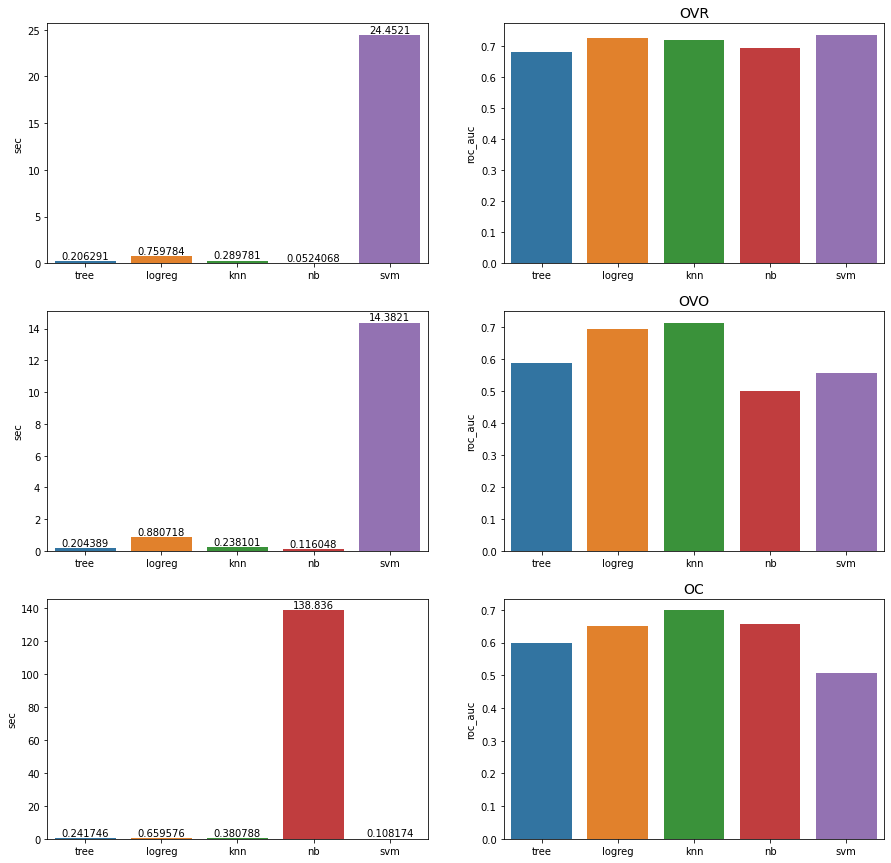

In [53]:
plt.figure(figsize=(15,15))
 
# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function

plt.subplot(3,2, 1)
ax  = sns.barplot(y=ovr_res['sec'], x=ovr_res.index)
ax.bar_label(ax.containers[0])
plt.subplot(3,2, 2)
sns.barplot(y=ovr_res['roc_auc'], x=ovr_res.index)
plt.title("OVR", fontsize=14)


plt.subplot(3,2, 3)
ax =  sns.barplot(y=ovo_res['sec'], x=ovr_res.index)
ax.bar_label(ax.containers[0])
plt.subplot(3,2, 4)
sns.barplot(y=ovo_res['roc_auc'], x=ovr_res.index)
plt.title("OVO", fontsize=14)


plt.subplot(3,2, 5)
ax = sns.barplot(y=oc_res['sec'], x=ovr_res.index)
ax.bar_label(ax.containers[0])
plt.subplot(3,2, 6)
sns.barplot(y=oc_res['roc_auc'], x=ovr_res.index)
plt.title("OC", fontsize=14);


Наилучшая точность наблюдается при алгоритме One vs Rest